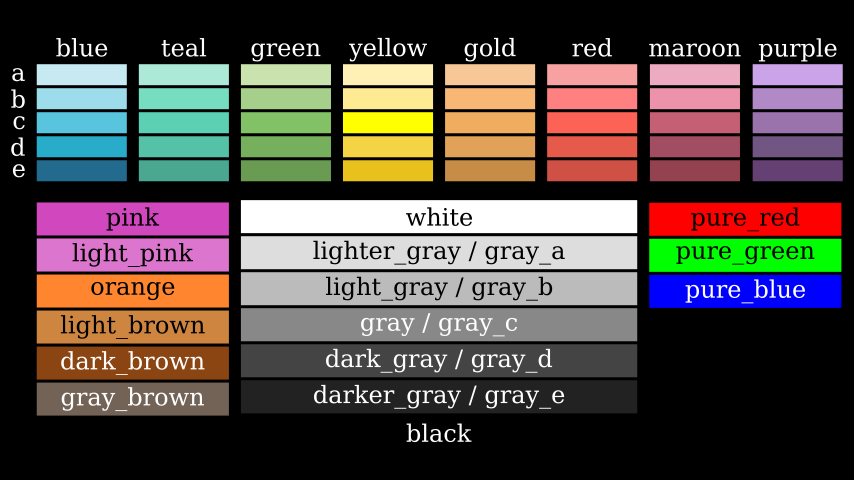

In [1]:
from manim import *

config.media_width = "60%"
config.quality = 'low_quality'

PINK = "#EE82EE"
VIOLET = "#4B0082"
# palette = [VIOLET, BLUE_D, PINK, YELLOW, ORANGE, RED, PURPLE_A]
palette = ["#FF008E", "#D22779", "#612897", "#FF008E", "#0C1E7F"]

def circInv2d(pos=[0,0,0],circle=Circle()):
    
    x,y,z=pos
    cx, cy, cz = circle.get_center()
    cr = circle.radius
    
    dx = x - cx; dy = y - cy
    d = np.hypot(dx, dy)
    
    if (d!=0):
        dx = dx / d; dy = dy / d
        dnew = cr ** 2.0 / d
        x = float(dnew * dx + cx)
        y = float(dnew * dy + cy)

        return [x,y,z]
    else:
        return [0.0,0.0,0.0]
    


Manim Community v0.14.0

In [31]:
%%manim MmodNTrackerSTAR
ASPECT_RATIO = 16.0 / 9.0
FRAME_HEIGHT = 8.0
FRAME_WIDTH = FRAME_HEIGHT * ASPECT_RATIO
FRAME_Y_RADIUS = FRAME_HEIGHT / 2
FRAME_X_RADIUS = FRAME_WIDTH / 2

def regular_vertices(n, *, radius=1, start_angle=None):
    if start_angle is None:
        if n % 2 == 0:
            start_angle = 0
        else:
            start_angle = TAU / 4

    start_vector = rotate_vector(RIGHT * radius, start_angle)
    vertices     = compass_directions(n, start_vector)

    return vertices, start_angle

class Star(Polygon):
    """ Develop by friedkeenan"""
    def __init__(self, n=6, *, density=2, outer_radius=1, inner_radius=None, start_angle=None, **kwargs):
        if density <= 0 or density >= n / 2:
            raise ValueError(f"Incompatible density {density}")

        inner_angle = TAU / (2 * n)

        if inner_radius is None:
            # Calculate the inner radius for n and density.
            # See https://math.stackexchange.com/a/2136292

            outer_angle = TAU * density / n

            inverse_x = 1 - np.tan(inner_angle) * ((np.cos(outer_angle) - 1) / np.sin(outer_angle))

            inner_radius = outer_radius / (np.cos(inner_angle) * inverse_x)

        outer_vertices, self.start_angle = regular_vertices(n, radius=outer_radius, start_angle=start_angle)
        inner_vertices, _                = regular_vertices(n, radius=inner_radius, start_angle=self.start_angle + inner_angle)

        vertices = []
        for pair in zip(outer_vertices, inner_vertices):
            vertices.extend(pair)

        super().__init__(*vertices, **kwargs)

class MmodNTrackerSTAR(Scene):
    number_of_lines = 301
    gradient_colors = [RED,YELLOW,BLUE]
    end_value = 17 # =int(np.sqrt(301))
    total_time = 10 #4 * 60
    def construct(self):
        mod_tracker = ValueTracker(1)
        side_tracker = ValueTracker(3)
        circle = always_redraw(lambda: RegularPolygon(int(side_tracker.get_value()),start_angle=30*DEGREES).rotate(PI/2).set(height=FRAME_HEIGHT*0.9))
        lines = always_redraw(lambda: self.get_m_mod_n_objects(circle,mod_tracker.get_value()))
        self.add(circle,lines)
#         lines.add_updater(
#             lambda mob: mob.become(
#                 self.get_m_mod_n_objects(circle,mod_tracker.get_value())
#                 )
#             )
#         self.add(circle,lines)
        self.play(
#             mod_tracker.animate.set_value(self.end_value),
            mod_tracker.animate.increment_value(1),
            side_tracker.animate.increment_value(3),
            rate_func=linear,
#             run_time=self.total_time
            )
        self.play(
            mod_tracker.animate.increment_value(2),
            side_tracker.animate.increment_value(2),
            rate_func=linear,
            )
        self.play(
            mod_tracker.animate.increment_value(3),
            side_tracker.animate.increment_value(1),
            rate_func=linear,
            )
        lines.clear_updaters() 

    def get_m_mod_n_objects(self,circle,x,y=None):
        if y==None:
            y = self.number_of_lines
        lines = VGroup()
        for i in range(y):
            start_point = circle.point_from_proportion((i%y)/y)
            end_point = circle.point_from_proportion(((i*x)%y)/y)
            line = Line(start_point,end_point).set_stroke(width=1)
            lines.add(line)
        lines.set_color_by_gradient(*self.gradient_colors)
        return lines


[02/23/22 15:40:42] INFO     Animation 0 : Partial movie file        ]8;id=224919;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=999607;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\MmodNTrack                         
                             erSTAR\3163782288_500957488_3121808660.                         
                             mp4'

INFO:manim:Animation 0 : Partial movie file written in 'D:\Programming\Python\jupyter notebooks\media\videos\jupyter notebooks\480p15\partial_movie_files\MmodNTrackerSTAR\3163782288_500957488_3121808660.mp4'


[02/23/22 15:41:33] INFO     Animation 1 : Partial movie file        ]8;id=273461;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=966537;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\MmodNTrack                         
                             erSTAR\2201830969_3378999134_2632344142                         
                             .mp4'

INFO:manim:Animation 1 : Partial movie file written in 'D:\Programming\Python\jupyter notebooks\media\videos\jupyter notebooks\480p15\partial_movie_files\MmodNTrackerSTAR\2201830969_3378999134_2632344142.mp4'


[02/23/22 15:42:22] INFO     Animation 2 : Partial movie file        ]8;id=3166;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=766600;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\MmodNTrack                         
                             erSTAR\2201830969_1571492625_3780098336                         
                             .mp4'

INFO:manim:Animation 2 : Partial movie file written in 'D:\Programming\Python\jupyter notebooks\media\videos\jupyter notebooks\480p15\partial_movie_files\MmodNTrackerSTAR\2201830969_1571492625_3780098336.mp4'


                    INFO     Combining to Movie file.                ]8;id=620422;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=752310;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#608\608]8;;\

INFO:manim:Combining to Movie file.


                    INFO                                             ]8;id=632776;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=797218;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#729\729]8;;\
                             File ready at                                                   
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter                                  
                             notebooks\480p15\MmodNTrackerSTAR.mp4'

INFO:manim:
File ready at 'D:\Programming\Python\jupyter notebooks\media\videos\jupyter notebooks\480p15\MmodNTrackerSTAR.mp4'



                    INFO     Rendered MmodNTrackerSTAR                           ]8;id=901961;file://D:\Python39\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=121174;file://D:\Python39\lib\site-packages\manim\scene\scene.py#237\237]8;;\
                             Played 3 animations

INFO:manim:Rendered MmodNTrackerSTAR
Played 3 animations


In [ ]:
%%manim Bug

class Bug(Scene):
    def construct(self):
        outer = Circle(radius=4,fill_opacity=1,color=WHITE)
        rectangle = Rectangle(width=8, height=4).shift(2*DOWN)
        half_circle = Difference(outer,rectangle)
        quarter_circle =  Circle(radius=2)
        jin = Difference(Union(half_circle, quarter_circle.copy().shift(2*LEFT)),quarter_circle.copy().shift(2*RIGHT))
        jang = Difference(outer, jin, fill_opacity=1)
        self.play(Create(jin))
        self.play(TransformFromCopy(jin, jang))
        self.add(jang)
        self.play(Uncreate(jin), Uncreate(jang))
#         self.wait()


In [77]:
%%manim DotShit1

import random
class DotShit1(MovingCameraScene):
    dots = 8**2
    def construct(self):
        def get_dots():
            g1=VGroup(*[Dot(fill_opacity=random.random()) for _ in range(self.dots)]).arrange_in_grid(buff=SMALL_BUFF)
            g2=VGroup(*[Dot(fill_opacity=random.random()) for _ in range(self.dots)]).arrange_in_grid(buff=MED_LARGE_BUFF)
            g3=VGroup(*[Dot(fill_opacity=random.random()) for _ in range(self.dots)]).arrange_in_grid(buff=LARGE_BUFF)
            _g=VGroup(g1,g2,g3)
            _g.set_color(random_bright_color())
            return _g
        _g=get_dots()
        self.add(_g)
#         self.wait()
#         self.play(_g.animate.apply_to_family( lambda mob: mob.apply_function(lambda pos: circInv2d(pos ))), run_time=2, rate_function=linear) #1/(_+1)
        for _ in range(5):
            self.play(Transform(_g, get_dots()))


[02/23/22 07:38:10] INFO     Animation 0 : Partial movie file        ]8;id=912027;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=652824;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\DotShit1\1                         
                             778658159_2069808786_1240453128.mp4'

[02/23/22 07:38:12] INFO     Animation 1 : Partial movie file        ]8;id=472642;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=868074;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\DotShit1\7                         
                             7364255_3975029291_1240453128.mp4'

[02/23/22 07:38:14] INFO     Animation 2 : Partial movie file        ]8;id=112558;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=613701;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\DotShit1\7                         
                             7364255_3973121378_1240453128.mp4'

[02/23/22 07:38:16] INFO     Animation 3 : Partial movie file        ]8;id=204060;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=16397;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\DotShit1\7                         
                             7364255_1144726991_1240453128.mp4'

[02/23/22 07:38:19] INFO     Animation 4 : Partial movie file        ]8;id=339001;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=878959;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\DotShit1\7                         
                             7364255_729303168_1240453128.mp4'

                    INFO     Combining to Movie file.                ]8;id=224142;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=768166;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#608\608]8;;\

                    INFO                                             ]8;id=566972;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=708644;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#729\729]8;;\
                             File ready at                                                   
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter                                  
                             notebooks\480p15\DotShit1.mp4'

                    INFO     The partial movie directory is full (>  ]8;id=752940;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=936657;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#700\700]8;;\
                             100 files). Therefore, manim has                                
                             removed the 5 oldest file(s). You can                           
                             change this behaviour by changing                               
                             max_files_cached in config.

                    INFO     Rendered DotShit1                                   ]8;id=957464;file://D:\Python39\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=320555;file://D:\Python39\lib\site-packages\manim\scene\scene.py#237\237]8;;\
                             Played 5 animations

In [74]:
%%manim Sunflower1

class Sunflower1(Scene):
    def construct(self):
        # Golden Angle
        GA = PI * (3 - 5 ** 0.5)

        def Bloom(a=GA, n=300):
            Plane = PolarPlane()
            flower = VGroup()
            for i in range(n):
                r = 0.025 + (0.00043 * i)
                pos = Plane.polar_to_point(0.03 + (0.01 * i), a * (n - i))
                seed = Dot(
                    point=pos,
                    radius=r,
                    color=interpolate_color("#c3ff12", "#ffc512", i / (n - 1)),
                )
                flower.add(seed)
            return flower

        val = ValueTracker(3 * PI / 4)

        ang = MathTex(r"\theta = ", font_size=55)
        num = DecimalNumber(
            val.get_value() * 180 / PI,
            5,
            show_ellipsis=True,
            unit="^\circ",
            font_size=53,
        ).next_to(ang)
        ang.add(num).to_corner(UL)

        sf = Bloom(val.get_value())

        # Updaters
        num.add_updater(lambda m: m.set_value(val.get_value() * 180 / PI))
        sf.add_updater(lambda m: m.become(Bloom(val.get_value())))
        self.add(ang, sf)

        self.wait()
        self.play(val.animate(rate_func=linear, run_time=15).set_value(GA))

        VGroup(sf, num).clear_updaters()
        self.wait()

In [87]:
%%manim Sunflower2
class Sunflower2(Scene):
    def construct(self):
        # Golden Angle
        GA = PI * (3 - 5 ** 0.5)

        def Bloom(a=GA, n=300):
            flower = VGroup()
            for i in range(n):
                seed = Dot(
                    point=PolarPlane().polar_to_point(0.03 + (0.01 * i), a * (n - i)),
                    radius=0.025 + (0.00043 * i),
                    color=interpolate_color("#c3ff12", "#ffc512", i / (n - 1)),
                )
                flower.add(seed)
            return flower

        sf = Bloom()
        self.add(sf)

        self.wait()
        self.play(*[FadeToColor(i, "#F0DFC5") for i in sf], lag_ratio=0.005)
        self.wait()

        # list of colors
        c = ["#ff0000", "#00ffff", "#00ff00", "#ff00ff", "#0000ff", "#ffff00"]

        # colorful spirals animation
        for n, m in [[21, 8], [34, 13]]:  # Fibonacci Numbers
            Anim1 = AnimationGroup(
                *[
                    FadeToColor(sf[(i * m) % n :: n], c[i % 6], lag_ratio=0.2)
                    for i in range(n)
                ],
                lag_ratio=0.15
            )
            Anim2 = AnimationGroup(
                *[         FadeToColor(sf[(i * m) % n :: n], "#F0DFC5", lag_ratio=0.5)
                    for i in range(n)
                ]
            )
            self.play(Anim1)
            self.wait(3)

            self.play(Anim2)
            self.wait(2)
#             self.play(sf.animate.apply_to_family( lambda mob: mob.apply_function(lambda pos: circInv2d(pos ))), run_time=2, rate_function=linear) #1/(_+1)
           

[02/21/22 15:48:09] INFO     Animation 0 : Using cached data (hash :     ]8;id=967533;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=859702;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             3163782288_1515588106_1163427118)

[02/21/22 15:48:11] INFO     Animation 1 : Using cached data (hash :     ]8;id=907206;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=191814;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_4273093141_3935323071)

[02/21/22 15:48:12] INFO     Animation 2 : Partial movie file        ]8;id=400362;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=172058;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\Sunflower2                         
                             \1495979052_2478587744_3933519075.mp4'

[02/21/22 15:48:13] INFO     Animation 3 : Using cached data (hash :     ]8;id=782134;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=880679;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_989727414_283240127)

[02/21/22 15:48:14] INFO     Animation 4 : Using cached data (hash :     ]8;id=623116;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=401543;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_120073445_3320573027)

[02/21/22 15:48:15] INFO     Animation 5 : Using cached data (hash :     ]8;id=361914;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=725492;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_3357799041_54533838)

[02/21/22 15:48:16] INFO     Animation 6 : Using cached data (hash :     ]8;id=880810;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=473861;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_1152718458_2981950618)

[02/21/22 15:48:19] INFO     Animation 7 : Using cached data (hash :     ]8;id=823479;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=183087;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_3615644845_369407985)

[02/21/22 15:48:30] INFO     Animation 8 : Partial movie file        ]8;id=184482;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=548873;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\Sunflower2                         
                             \1495979052_883055070_2515069055.mp4'

                    INFO     Animation 9 : Using cached data (hash :     ]8;id=104183;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=970845;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_120073445_3951473942)

[02/21/22 15:48:31] INFO     Animation 10 : Using cached data (hash :    ]8;id=466705;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=816737;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_857138190_2702010715)

[02/21/22 15:48:32] INFO     Animation 11 : Using cached data (hash :    ]8;id=168361;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=856875;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_1152718458_11737933)

[02/21/22 15:48:35] INFO     Animation 12 : Using cached data (hash :    ]8;id=626562;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=225180;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_3213000333_2265864340)

[02/21/22 15:48:36] INFO     Combining to Movie file.                ]8;id=149748;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=489527;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#608\608]8;;\

                    INFO                                             ]8;id=454294;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=521466;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#729\729]8;;\
                             File ready at                                                   
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter                                  
                             notebooks\480p15\Sunflower2.mp4'

                    INFO     Rendered Sunflower2                                 ]8;id=680214;file://D:\Python39\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=462859;file://D:\Python39\lib\site-packages\manim\scene\scene.py#237\237]8;;\
                             Played 13 animations

In [54]:
%%manim Sunflower3
class Sunflower3(Scene):
    def construct(self):
        # Golden Angle
        GA = PI * (3 - 5 ** 0.5)
        _n=ValueTracker(0)
        _a=ValueTracker(0)
        
        def Bloom(mob=None):
            n=int(_n.get_value())
            a=_a.get_value()
            g = Polygon(*[PolarPlane().polar_to_point(i/(n+1), a * (n - i)) for i in range(n+1) ]).scale(4)
            g.center()
#             g.set_color_by_gradient(*palette)
            if mob is None:
                return g
            else:
                mob.become( g )
                

        self.add( always_redraw(Bloom) )
        self.play(_a.animate.set_value(GA),_n.animate.set_value(120),
                  run_time=5,)
        self.play(_a.animate.set_value(0),_n.animate.set_value(666),
                  run_time=5,)
        self.play(_a.animate.set_value(3),_n.animate.set_value(0),
                  run_time=5,)
#         self.play(_a.animate.set_value(0),
#                   run_time=5,)

        self.wait()


[02/22/22 00:04:24] INFO     Animation 0 : Using cached data (hash :     ]8;id=979528;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=993621;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             3163782288_974917106_1482048056)

[02/22/22 00:17:39] INFO     Animation 1 : Partial movie file        ]8;id=613106;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=236474;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\Sunflower3                         
                             \2201830969_1093114715_727697596.mp4'

[02/22/22 00:31:03] INFO     Animation 2 : Partial movie file        ]8;id=840956;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=180491;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\Sunflower3                         
                             \2201830969_4073103434_1394703628.mp4'

                    INFO     Animation 3 : Partial movie file        ]8;id=647986;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=101069;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\Sunflower3                         
                             \2201830969_398514950_1349634849.mp4'

                    INFO     Combining to Movie file.                ]8;id=156663;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=201572;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#608\608]8;;\

[02/22/22 00:31:04] INFO                                             ]8;id=965284;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=498693;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#729\729]8;;\
                             File ready at                                                   
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter                                  
                             notebooks\480p15\Sunflower3.mp4'

                    INFO     The partial movie directory is full (>  ]8;id=50839;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=332006;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#700\700]8;;\
                             100 files). Therefore, manim has                                
                             removed the 3 oldest file(s). You can                           
                             change this behaviour by changing                               
                             max_files_cached in config.

                    INFO     Rendered Sunflower3                                 ]8;id=515823;file://D:\Python39\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=973474;file://D:\Python39\lib\site-packages\manim\scene\scene.py#237\237]8;;\
                             Played 4 animations

In [ ]:
%%manim CW_KochCurve


class CW_KochCurve(Scene):
    def construct(self):
        def KochCurve(
            n, length=12, stroke_width=8, color=("#0A68EF", "#4AF1F2", "#0A68EF")
        ):

            l = length / (3 ** n)

            LineGroup = Line().set_length(l)

            def NextLevel(LineGroup):
                return VGroup(
                    *[LineGroup.copy().rotate(i) for i in [0, PI / 3, -PI / 3, 0]]
                ).arrange(RIGHT, buff=0, aligned_edge=DOWN)

            for _ in range(n):
                LineGroup = NextLevel(LineGroup)

            KC = (
                VMobject(stroke_width=stroke_width)
                .set_points(LineGroup.get_all_points())
                .set_color(color)
            )
            return KC

        level = Variable(0, Tex("level"), var_type=Integer).set_color("#4AF1F2")
        txt = (
            VGroup(Tex("Koch Curve", font_size=60), level)
            .arrange(DOWN, aligned_edge=LEFT)
            .to_corner(UL)
        )
        kc = KochCurve(0, stroke_width=12).to_edge(DOWN, buff=2.5)

        self.add(txt, kc)
        self.wait()

        for i in range(1, 6):
            self.play(
                level.tracker.animate.set_value(i),
                kc.animate.become(
                    KochCurve(i, stroke_width=12 - (2 * i)).to_edge(DOWN, buff=2.5)
                ),
            )
            self.wait()

        for i in range(4, -1, -1):
            self.play(
                level.tracker.animate.set_value(i),
                kc.animate.become(
                    KochCurve(i, stroke_width=12 - (2 * i)).to_edge(DOWN, buff=2.5)
                ),
            )
            self.wait()


In [84]:
def FibonacciGen():
    a=0
    b=1
    while(True):
        a,b=b,a+b
        yield b

fibo=FibonacciGen()

for _ in range(15):
    print(next(fibo))


1
2
3
5
8
13
21
34
55
89
144
233
377
610
987


In [76]:
%%manim FibonacciSpiral


class FibonacciSpiral(Scene):
    def construct(self):

        squares = VGroup(Square(1 * 0.3))
        next_dir = [RIGHT, UP, LEFT, DOWN]
        FSeq = [1, 2, 3, 5, 8, 13, 21]

        for j, i in enumerate(FSeq):
            d = next_dir[j % 4]
            squares.add(Square(i * 0.3).next_to(squares, d, buff=0))

        squares.center()

        direction = [1, -1, -1, 1]
        corner = [[UL, -UL], [UR, -UR]]
        spiral = VGroup()

        for j, i in enumerate(squares):
            c = corner[j % 2]
            d = direction[j % 4]
            arc = ArcBetweenPoints(
                i.get_corner(c[0]),
                i.get_corner(c[1]),
                angle=PI / 2 * d,
                color="#04d9ff",
                stroke_width=6,
            )
            if direction[j % 4] != 1:
                arc = arc.reverse_direction()
            spiral.add(arc)

        self.play(
            LaggedStart(
                FadeIn(squares, lag_ratio=1), Create(spiral, lag_ratio=1), run_time=5
            )
        )
        self.wait()

        self.play(FadeOut(squares), Uncreate(spiral[::-1]), run_time=1.5)

[02/21/22 15:33:38] INFO     Animation 0 : Using cached data (hash :     ]8;id=312974;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=200466;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             3163782288_2476539187_212655260)

                    INFO     Animation 1 : Partial movie file        ]8;id=677604;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=55449;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\FibonacciS                         
                             piral\1495979052_2478587744_772179918.m                         
                             p4'

                    INFO     Animation 2 : Using cached data (hash :     ]8;id=798705;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=799752;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_2102292477_1293428415)

[02/21/22 15:33:39] INFO     Combining to Movie file.                ]8;id=840821;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=801990;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#608\608]8;;\

                    INFO                                             ]8;id=883400;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=710584;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#729\729]8;;\
                             File ready at                                                   
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter                                  
                             notebooks\480p15\FibonacciSpiral.mp4'

                    INFO     Rendered FibonacciSpiral                            ]8;id=800268;file://D:\Python39\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=914590;file://D:\Python39\lib\site-packages\manim\scene\scene.py#237\237]8;;\
                             Played 3 animations

In [ ]:
%%manim DotShit

import random
class DotShit(MovingCameraScene):
    
    def construct(self):
        c=Circle()
        g=Group()
        for k in range(5):
            for v in RegularPolygram(3+k, radius=1).get_vertices():
                g.add(Circle(radius=2**k).move_to(v))
#         g.apply_to_family(lambda mob: mob.apply_function(circInv2d))
        g.set_color_by_gradient(*palette)
    
#         g.apply_to_family(lambda mob: mob.apply_function(circInv2d))
#         self.play(FadeIn(g))
        self.add(g)
        for _ in range(10):
            self.play(g.animate.apply_to_family( lambda mob: mob.apply_function(lambda pos: circInv2d(pos ))), run_time=2, rate_function=linear) #1/(_+1)
            self.play(g.animate.shift(.25**_*UP), rate_function=linear)
#             self.play(g.animate.move_to(ORIGIN), rate_function=linear)
#             self.play(self.camera.frame.animate.scale(), rate_function=linear)
                
            
#         self.play(self.camera.frame.animate.scale(4))
        
        

[02/21/22 11:18:02] INFO     Animation 0 : Using cached data (hash :     ]8;id=321063;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=707475;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             1778658159_343798512_212655260)

[02/21/22 11:18:03] INFO     Animation 1 : Using cached data (hash :     ]8;id=475862;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=245760;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             77364255_2828737451_212655260)

                    INFO     Animation 2 : Using cached data (hash :     ]8;id=742982;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=312114;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             77364255_1651204134_212655260)

                    INFO     Animation 3 : Using cached data (hash :     ]8;id=653060;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=660054;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             77364255_1538604230_212655260)

                    INFO     Animation 4 : Using cached data (hash :     ]8;id=393940;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=11849;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             77364255_1396025677_212655260)

[02/21/22 11:18:04] INFO     Animation 5 : Partial movie file        ]8;id=532281;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=389366;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\DotShit\77                         
                             364255_793739026_212655260.mp4'

                    INFO     Animation 6 : Using cached data (hash :     ]8;id=70832;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=217328;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             77364255_1735826917_212655260)

                    INFO     Animation 7 : Using cached data (hash :     ]8;id=670175;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=454426;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             77364255_4195687157_212655260)

                    INFO     Animation 8 : Using cached data (hash :     ]8;id=309911;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=572527;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             77364255_3345473539_212655260)

                    INFO     Animation 9 : Using cached data (hash :     ]8;id=998683;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=176552;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             77364255_2980349819_212655260)

[02/21/22 11:18:05] INFO     Animation 10 : Using cached data (hash :    ]8;id=604354;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=954706;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             77364255_40564508_212655260)

                    INFO     Animation 11 : Using cached data (hash :    ]8;id=458203;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=891947;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             77364255_2932236547_212655260)

                    INFO     Animation 12 : Using cached data (hash :    ]8;id=13252;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=894225;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             77364255_2612637354_212655260)

                    INFO     Animation 13 : Using cached data (hash :    ]8;id=140084;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=43105;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             77364255_2138767421_212655260)

                    INFO     Animation 14 : Using cached data (hash :    ]8;id=314161;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=437153;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             77364255_3893140933_212655260)

[02/21/22 11:18:06] INFO     Animation 15 : Using cached data (hash :    ]8;id=604080;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=362509;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             77364255_3659326663_212655260)

                    INFO     Animation 16 : Using cached data (hash :    ]8;id=608512;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=702920;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             77364255_4095433282_212655260)

                    INFO     Animation 17 : Using cached data (hash :    ]8;id=577229;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=965000;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             77364255_208108972_212655260)

                    INFO     Animation 18 : Using cached data (hash :    ]8;id=181237;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=37163;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             77364255_2693799909_212655260)

                    INFO     Animation 19 : Using cached data (hash :    ]8;id=822436;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=63693;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             77364255_3862088302_212655260)

                    INFO     Combining to Movie file.                ]8;id=143248;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=912452;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#608\608]8;;\

[02/21/22 11:18:07] INFO                                             ]8;id=889987;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=991529;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#729\729]8;;\
                             File ready at                                                   
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter                                  
                             notebooks\480p15\DotShit.mp4'

                    INFO     The partial movie directory is full (>  ]8;id=453516;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=529807;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#700\700]8;;\
                             100 files). Therefore, manim has                                
                             removed the 3 oldest file(s). You can                           
                             change this behaviour by changing                               
                             max_files_cached in config.

                    INFO     Rendered DotShit                                    ]8;id=485280;file://D:\Python39\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=981740;file://D:\Python39\lib\site-packages\manim\scene\scene.py#237\237]8;;\
                             Played 20 animations

In [ ]:
%%manim StarOfDavid

import random
class StarOfDavid(Scene):
    def construct(self):
        group=Group()
        t=ValueTracker(3)
        r=ValueTracker(3)
   
        oh_wey=always_redraw(lambda: RegularPolygram(int(t.get_value()), radius=3, start_angle=r.get_value()*DEGREES, color=random_bright_color(), fill_opacity=0) ) #color=BLUE,
        oh_gewalt=always_redraw(lambda: oh_wey.copy().apply_function(lambda p: circInv2d(pos=p, cr=3)))
#         oh_wey.add_updater(lambda z: z.become(RegularPolygram(int(t.get_value()), radius=3, start_angle=t.get_value()*r.get_value()*DEGREES, color=random_bright_color(), fill_opacity=random.random())))
#         oh_gewalt.add_updater(lambda z: z.become(RegularPolygram(int(t.get_value()), radius=3, start_angle=t.get_value()*r.get_value()*DEGREES, color=random_bright_color(), fill_opacity=0).apply_function(lambda p: circInv2d(pos=p, cr=r.get_value()))))
        group.add(oh_wey, oh_gewalt)

        papaj=always_redraw( lambda: ImageMobject('papaj.png').scale( r.get_value() ) )
        
#         self.play( papaje.animate.apply_function(lambda p: circInv2d(pos=p, cr=4)),  rate_function=linear, run_time=10)
        
        
        c0 = Circle(radius=3*3**(-.5), color=WHITE, fill_opacity=0)
        c1 = Circle(radius=3, color=WHITE, fill_opacity=0)
 
        self.add( group)
        self.play(t.animate.set_value(5), r.animate.set_value(0), rate_function=linear)
        self.add( papaj )
        self.play(AnimationGroup(*[t.animate.set_value(8),r.animate.set_value(5)], lag_ratio=0.04), rate_function=linear)
        self.play(t.animate.set_value(6),r.animate.set_value(0), rate_function=linear)
         #, rate_function=linear

In [ ]:
%%manim Geogebra1

import random
# t, chunks, circle_count, max_radius, offset; q=np.sin(PI*t/2000); 

class Geogebra1(Scene):
    circle_count = 3
    max_radius = 4
    offset = 0
    max_random = 0
    def construct(self):
        cc=ValueTracker(self.circle_count)
        r=ValueTracker(self.offset)
        t=ValueTracker(0)
        papaj=ImageMobject('papaj.png').scale(10)
        oh_wey=RegularPolygram(6, radius=3, start_angle=30*DEGREES, color=RED_E, stroke_color=WHITE,fill_opacity=.5) #color=BLUE,
            
        circles = VGroup(*[Circle(radius=R, color=WHITE).move_to(np.multiply([random.random(), random.random(), 0], self.max_random)) for R in np.linspace(1,self.max_radius, int(cc.get_value()))])

        poly = always_redraw(lambda: Polygon(*[np.multiply([np.cos(r.get_value()+t.get_value()*n), np.sin(r.get_value()+t.get_value()*n), 0 ], R) for n, R in enumerate(np.linspace(0,self.max_radius, int(cc.get_value())))], color=WHITE))
        
        self.play(FadeIn(circles, poly))
        self.play(cc.animate.set_value(256), t.animate.increment_value(30),r.animate.increment_value(-10), rate_function=linear, run_time=10)
        self.play(t.animate.increment_value(30),  r.animate.increment_value(-20), rate_function=linear, run_time=10)
        self.play(cc.animate.set_value(6), t.animate.set_value(60),r.animate.set_value(0), poly.animate.apply_function(lambda p: circInv2d(pos=p, cr=self.max_radius)),  rate_function=linear, run_time=10)
        self.remove(circles)
        self.play(Uncreate(poly), rate_function=linear)
#         self.play( GrowFromCenter(papaj), rate_function=linear)
        self.wait()
        
